In [1]:
# ============================================================
# 1️⃣ Import Libraries
# ============================================================

import pandas as pd        # For working with data tables
import numpy as np         # For numerical operations
import matplotlib.pyplot as plt  # For charts and graphs

# Display all columns when viewing data
pd.set_option('display.max_columns', None)


Matplotlib is building the font cache; this may take a moment.


In [2]:
# ============================================================
# 2️⃣ Load Dataset
# ============================================================

df = pd.read_csv("Superstore.csv", encoding='latin1')
df.head()  # Show first 5 rows


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# ============================================================
# 3️⃣ Explore Data
# ============================================================

# Basic info about columns and missing values
df.info()

# Summary statistics (count, mean, min, max)
df.describe()

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
# ============================================================
# 4️⃣ Data Cleaning
# ============================================================

# Clean column names (make lowercase, remove spaces)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert dates if available
if 'order_date' in df.columns:
    df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Drop rows with missing sales or profit
df = df.dropna(subset=['sales', 'profit'])

# Create month column (for trend analysis)
if 'order_date' in df.columns:
    df['month'] = df['order_date'].dt.to_period('M').astype(str)

df.head()


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,month
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10


In [5]:
# ============================================================
# 5️⃣ Basic KPIs
# ============================================================

total_sales = df['sales'].sum()
total_profit = df['profit'].sum()
avg_profit_margin = (df['profit'] / df['sales']).mean() * 100

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Profit Margin: {avg_profit_margin:.2f}%")


Total Sales: $2,297,200.86
Total Profit: $286,397.02
Average Profit Margin: 12.03%


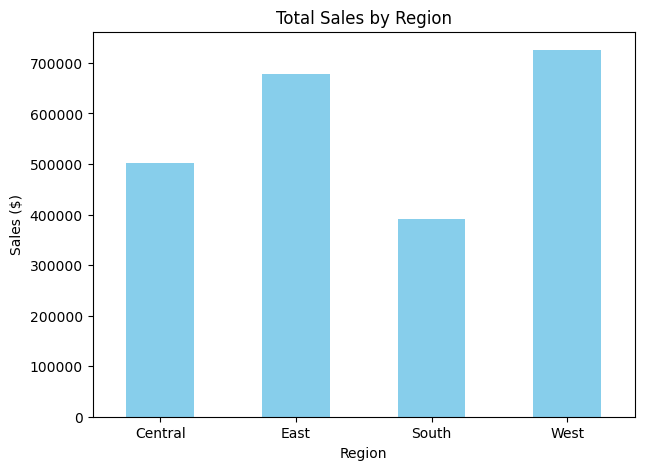

In [6]:
# Group and plot
sales_by_region = df.groupby('region')['sales'].sum()

plt.figure(figsize=(7,5))
sales_by_region.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Region")
plt.ylabel("Sales ($)")
plt.xlabel("Region")
plt.xticks(rotation=0)
plt.show()


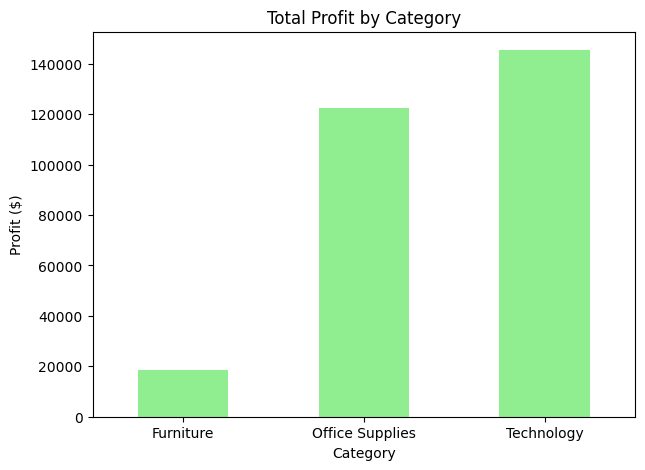

In [7]:
profit_by_category = df.groupby('category')['profit'].sum()

plt.figure(figsize=(7,5))
profit_by_category.plot(kind='bar', color='lightgreen')
plt.title("Total Profit by Category")
plt.ylabel("Profit ($)")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.show()


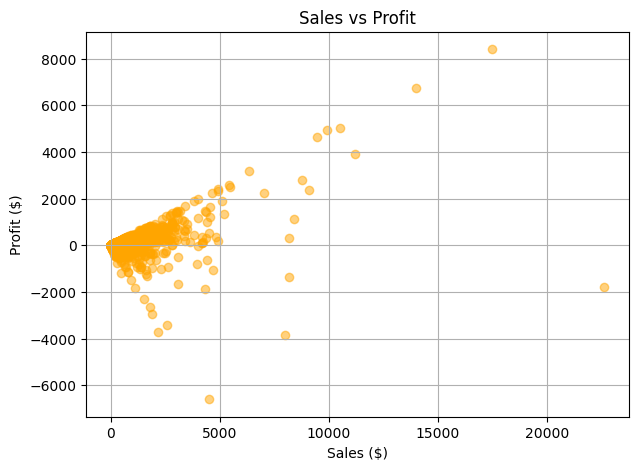

In [8]:
plt.figure(figsize=(7,5))
plt.scatter(df['sales'], df['profit'], alpha=0.5, color='orange')
plt.title("Sales vs Profit")
plt.xlabel("Sales ($)")
plt.ylabel("Profit ($)")
plt.grid(True)
plt.show()


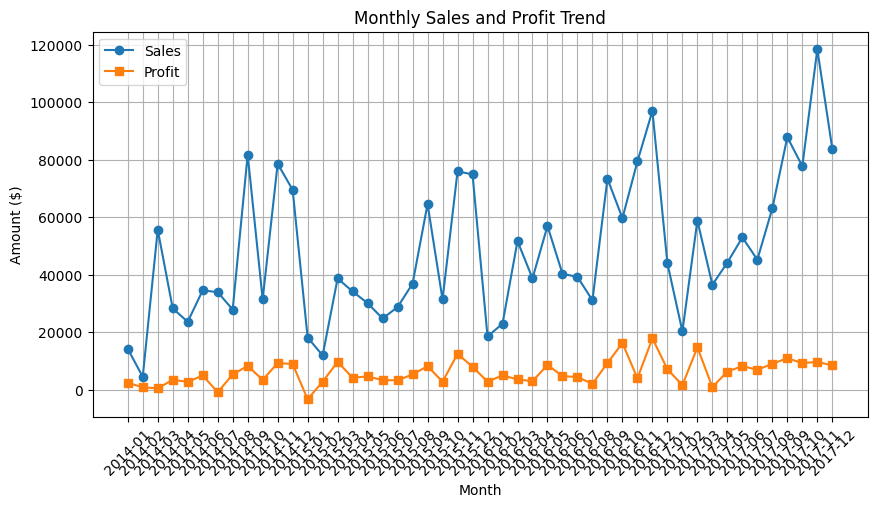

In [9]:
if 'month' in df.columns:
    monthly_sales = df.groupby('month')[['sales','profit']].sum()
    monthly_sales = monthly_sales.sort_index()

    plt.figure(figsize=(10,5))
    plt.plot(monthly_sales.index, monthly_sales['sales'], marker='o', label='Sales')
    plt.plot(monthly_sales.index, monthly_sales['profit'], marker='s', label='Profit')
    plt.title("Monthly Sales and Profit Trend")
    plt.xlabel("Month")
    plt.ylabel("Amount ($)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()
